<a href="https://colab.research.google.com/github/PvrpleJade/AIDA-2/blob/main/Multiple_Regression_(Kakegurui).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic 4 Lab 2: Multiple Linear Regression

## KAKEGURUI

###Panelo, Bryan
###Pineda, Matthew Alfred
###Santos, Franz Nico
###Surban, John Brian



Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
class MultipleLinearRegression():
  
  def correlations(X, y):
    global corr, corr1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values
    X = a - a.mean()
    X1 = b - b.mean()
    Y = y - y.mean()
    cov = np.mean(X * Y)
    cov1 = np.mean(X1 * Y)
    std_X = np.std(a)
    std_X1 = np.std(b)
    std_y = np.std(y)
    corr = cov / (std_X * std_y)
    corr1 = cov1 / (std_X1 * std_y)
    return print("R = ", corr1, corr) 
  def train(X,y):
    global w0, w1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values

    SD_x = np.std(a)
    SD_x1 = np.std(b)
    SD_y = np.std(y)

    r = np.corrcoef(a, y)[0,1]
    r1 = np.corrcoef(b, y)[0,1]

    w1 = r * (SD_y/SD_x)
    w1_1 = r1 * (SD_y/SD_x1)

    w0 = y.mean() - w1 * a.mean()
    w2 = y.mean() - w1_1 * b.mean()
    return print("w0: ", w0, "\nw1: ", w1, "\nw2: ", w2)

  def predict(X):
    global pred
    a = X.iloc[::,0].values
    pred = w0 + w1 * a
    index = np.array(list(range(0, pred.size)))
    return print("y_hat = ", pred, ", i = ", index)

  def evaluate(): # note: y_hat = predicted value; y = orig value; y_bar = y mean
    SSE = np.sum(np.square(pred - y[0:5]))
    SST = np.sum(np.square(y - y.mean()))
    MSE = np.mean(np.square(pred - y[0:5]))
    r2 = 1 - (SSE/SST)
    n = y.size 
    k = 1
    df = {'SST' : SST,
         'SSR' : np.sum(np.square(pred - y.mean())),
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : np.sqrt(MSE),
         'R-squared' : r2,
         'Adjusted R-squared' : 1 - ((1 - r2)*(n - 1)/(n-k-1))}
    return df
  
  def visualize(X_test, y_test):
    a = X_test.iloc[::,0].values
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(a, y_test)
    plt.plot(a, pred, color='red')
    return plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
pd.read_csv("/content/drive/My Drive/class list aida 2/real_estate_price_size_year.csv") 

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [70]:
import csv

X = pd.read_csv("/content/drive/My Drive/class list aida 2/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]



In [71]:
regressor = MultipleLinearRegression
R = regressor.correlations(X, y)
R
regressor.train(X_train, y_train)

R =  0.09301407775270568 0.86298272670127
w0:  97706.91683160246 
w1:  228.80069224806263 
w2:  -3483566.2271210123


In [ ]:
preds = regressor.predict(X_test)
preds

y_hat =  [223501.53742959 335073.90699743 441994.75849187 246036.1176091
 259077.75706724] , i =  [0 1 2 3 4]


In [ ]:
model_stats = regressor.evaluate()
model_stats

{'SST': 587759902740.0532,
 'SSR': 32216351588.10364,
 'SSE': 101107422761.33865,
 'MSE': 20221484552.26773,
 'RMSE': 142202.2663401246,
 'R-squared': 0.8279783593777149,
 'Adjusted R-squared': 0.8262230365142222}

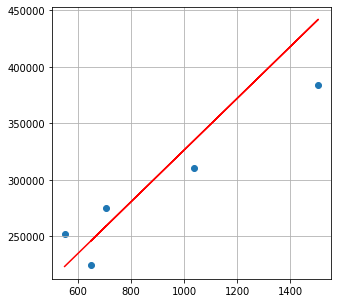

In [ ]:
regressor.visualize(X_test, y_test)

#PART 2

#LEC REQUIREMENT

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving death .csv to death  (1).csv


In [22]:
Dth = pd.read_csv("/content/drive/My Drive/class list aida 2/death .csv") 
Dth

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Yakutat City and Borough, Alaska<sup>3</sup>",2282,*,*,*,*,*,**,**,**,**
3137,"Yukon-Koyukuk Census Area, Alaska",2290,*,*,*,*,*,**,**,**,**
3138,"Zapata County, Texas",48505,*,*,*,*,*,*,*,*,*
3139,"Zavala County, Texas",48507,*,*,*,*,*,**,**,**,**


In [ ]:
Dth.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46.0,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73.0,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


#LAB REQUIREMENT

In [ ]:
A = Dth["Age-Adjusted Death Rate"]
B = Dth["Upper 95% Confidence Interval for Death Rate"]

In [ ]:
A 
B
np.corrcoef(A, B)

array([[1.        , 0.83758873],
       [0.83758873, 1.        ]])

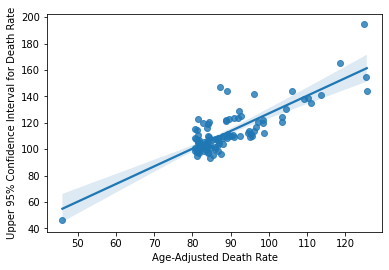

In [ ]:
import seaborn as sns

sns.regplot(x=Dth["Age-Adjusted Death Rate"], y=Dth["Upper 95% Confidence Interval for Death Rate"])

In [41]:
class regression():
  
  def correlations(X, y):
    global corr, corr1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values
    X = a - a.mean()
    X1 = b - b.mean()
    Y = y - y.mean()
    cov = np.mean(X * Y)
    cov1 = np.mean(X1 * Y)
    std_X = np.std(a)
    std_X1 = np.std(b)
    std_y = np.std(y)
    corr = cov / (std_X * std_y)
    corr1 = cov1 / (std_X1 * std_y)
    return print("R = ", corr1, corr) 
  def train(X,y):
    global w0, w1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values

    SD_x = np.std(a)
    SD_x1 = np.std(b)
    SD_y = np.std(y)

    r = np.corrcoef(a, y)[0,1]
    r1 = np.corrcoef(b, y)[0,1]

    w1 = r * (SD_y/SD_x)
    w1_1 = r1 * (SD_y/SD_x1)

    w0 = y.mean() - w1 * a.mean()
    w2 = y.mean() - w1_1 * b.mean()
    return print("w0: ", w0, "\nw1: ", w1, "\nw2: ", w2)

  def predict(X):
    global pred
    a = X.iloc[::,0].values
    pred = w0 + w1 * a
    index = np.array(list(range(0, pred.size)))
    return print("y_hat = ", pred, ", i = ", index)

  def evaluate(): # note: y_hat = predicted value; y = orig value; y_bar = y mean
    SSE = np.sum(np.square(pred - y[0:5]))
    SST = np.sum(np.square(y - y.mean()))
    MSE = np.mean(np.square(pred - y[0:5]))
    r2 = 1 - (SSE/SST)
    n = y.size 
    k = 1
    df = {'SST' : SST,
         'SSR' : np.sum(np.square(pred - y.mean())),
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : np.sqrt(MSE),
         'R-squared' : r2,
         'Adjusted R-squared' : 1 - ((1 - r2)*(n - 1)/(n-k-1))}
    return df
  
  def visualize(X_test, y_test):
    a = X_test.iloc[::,0].values
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(a, y_test)
    plt.plot(a, pred, color='red')
    return plt.show()

In [66]:
y = Dth['Age-Adjusted Death Rate']
X = Dth.drop(columns=['County', 'Recent Trend (2)','Met Objective of 45.5? (1)','Recent 5-Year Trend (2) in Death Rates'])
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]
y

0          46
1       125.6
2       125.3
3       124.9
4       118.5
        ...  
3136        *
3137        *
3138        *
3139        *
3140        *
Name: Age-Adjusted Death Rate, Length: 3141, dtype: object

#PART 3

#LEC REQUIREMENT

#LAB REQUIREMENT